Step 1: Installing Packages

In [1]:
!pip install -q ultralytics
!pip install -q roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8

In [8]:
!pip uninstall -y pillow-heif
!pip install pillow-heif==0.11.1

Found existing installation: pillow-heif 0.11.1
Uninstalling pillow-heif-0.11.1:
  Successfully uninstalled pillow-heif-0.11.1
  Using cached pillow_heif-0.11.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.1 kB)
Using cached pillow_heif-0.11.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.66 requires pillow-heif>=0.18.0, but you have pillow-heif 0.11.1 which is incompatible.


Step 2: Importing Core Libraries

In [1]:
from roboflow import Roboflow
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Step 3: Connecting to Roboflow to Load a Pretrained Brain Tumor YOLOv8 Model and Dataset

In [2]:
# Connect to Roboflow and load project

rf = Roboflow(api_key="------")  # You can use your own key here
project = rf.workspace("brain-tumor-35cuu").project("brain-tumor-detection-yolo8")
model = project.version(6).model

# Optionally download dataset (YOLOv8 format)
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to brain-tumor-detection-yolo8-1 in yolov8:: 100%|██████████| 379/379 [00:00<00:00, 9740.09it/s]


Step 4: Uploading a Brain MRI Image

In [3]:
from google.colab import files
uploaded = files.upload()

# This will return the filename of uploaded image
import os
image_path = list(uploaded.keys())[0]
print("Image uploaded:", image_path)


Saving MRII.jpg to MRII.jpg
Image uploaded: MRII.jpg


Step 5: # Run prediction


In [5]:
# Run prediction
pred_result = model.predict(image_path, confidence=20, overlap=30)
# Check prediction structure
print("Raw Prediction:", pred_result.__dict__)
pred_result

Raw Prediction: {'predictions': [{
  "x": 201,
  "y": 253,
  "width": 72,
  "height": 81,
  "confidence": 0.7475883960723877,
  "class": "pituitary-tumor",
  "class_id": 2,
  "detection_id": "b52b8b92-5c21-43ee-80a7-692b7e6a11ed",
  "image_path": "MRII.jpg",
  "prediction_type": "ObjectDetectionModel"
}], 'base_image_path': 'MRII.jpg', 'base_prediction_type': 'ObjectDetectionModel', 'image_dims': {'width': '512', 'height': '512'}}


Step 6: Drawing Bounding Boxes on Brain MRI

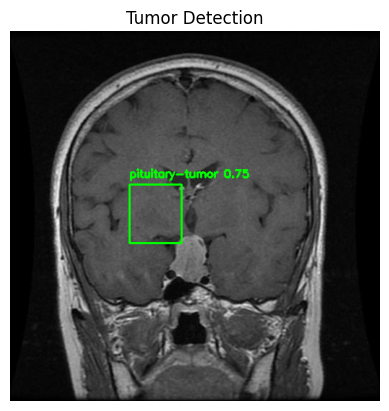

In [7]:
if pred_result.predictions:
    # Manually draw bounding boxes using OpenCV
    import cv2
    import matplotlib.pyplot as plt

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for pred in pred_result.predictions:
        x1 = int(pred['x'] - pred['width'] / 2)
        y1 = int(pred['y'] - pred['height'] / 2)
        x2 = int(pred['x'] + pred['width'] / 2)
        y2 = int(pred['y'] + pred['height'] / 2)
        label = pred['class']
        conf = pred['confidence']

        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, f"{label} {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    plt.imshow(img)
    plt.axis('off')
    plt.title("Tumor Detection")
    plt.show()
else:
    print("⚠️ No bounding boxes detected. Try lowering confidence or using a different image.")